In [1]:
#Descroption: Predict the future pricr of a stock using machine learning,facebook Prophet and python

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=yf.download('HES',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,61.330002,61.520000,60.410000,60.500000,50.525639,1384600
2010-01-04,61.840000,63.430000,61.770000,63.160000,52.747078,3729300
2010-01-05,63.599998,64.220001,63.139999,63.549999,53.072784,3195800
2010-01-06,63.310001,64.510002,63.310001,63.720001,53.214764,3545900
2010-01-07,63.560001,65.269997,63.080002,64.940002,54.233639,4994300
...,...,...,...,...,...,...
2022-12-05,146.309998,147.529999,140.089996,140.589996,140.589996,2396900
2022-12-06,139.410004,141.490005,134.419998,135.610001,135.610001,1756800
2022-12-07,135.899994,136.720001,133.630005,134.770004,134.770004,1525200


In [5]:
#Select the date and price
df['Date']=df.index
#Rename the features:
df=df.rename(columns={'Date':'ds','Close':'y'})
#Show The data
df=df[['ds','y']]
df

,ds,y
Date,,
2009-12-31,2009-12-31,60.500000
2010-01-04,2010-01-04,63.160000
2010-01-05,2010-01-05,63.549999
2010-01-06,2010-01-06,63.720001
2010-01-07,2010-01-07,64.940002
...,...,...
2022-12-05,2022-12-05,140.589996
2022-12-06,2022-12-06,135.610001
2022-12-07,2022-12-07,134.770004


In [6]:
#Get the last 20 rows of data and store the into a new variable
last=df[len(df)-20:]
last

,ds,y
Date,,
2022-11-11,2022-11-11,145.580002
2022-11-14,2022-11-14,145.509995
2022-11-15,2022-11-15,149.440002
2022-11-16,2022-11-16,146.699997
2022-11-17,2022-11-17,146.669998
2022-11-18,2022-11-18,143.990005
2022-11-21,2022-11-21,140.919998
2022-11-22,2022-11-22,148.110001
2022-11-23,2022-11-23,144.899994


In [7]:
#Get all of the rows in the data set except for the last 20 rows of data
df=df[:-20]
df

,ds,y
Date,,
2009-12-31,2009-12-31,60.500000
2010-01-04,2010-01-04,63.160000
2010-01-05,2010-01-05,63.549999
2010-01-06,2010-01-06,63.720001
2010-01-07,2010-01-07,64.940002
...,...,...
2022-11-04,2022-11-04,146.529999
2022-11-07,2022-11-07,148.740005
2022-11-08,2022-11-08,148.289993


In [8]:
#Getting the facebook prophet library
from prophet import Prophet
#Create the Prophet Object
fbp=Prophet(daily_seasonality=True)

In [9]:
#fit or train the model
fbp.fit(df)
future=fbp.make_future_dataframe(periods=365)
forecast=fbp.predict(future)

20:14:56 - cmdstanpy - INFO - Chain [1] start processing
20:14:59 - cmdstanpy - INFO - Chain [1] done processing


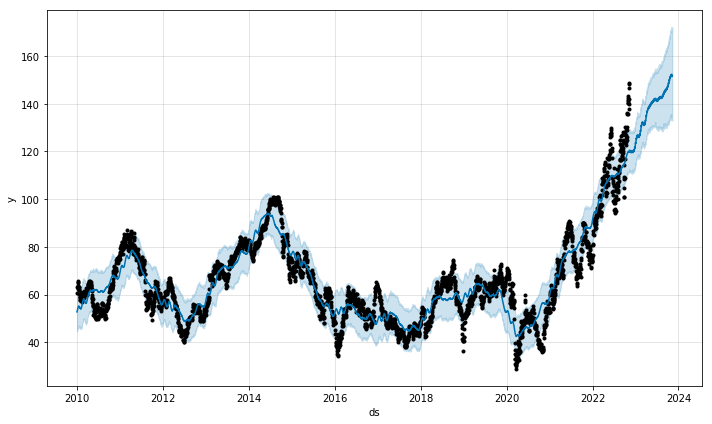

In [11]:
fbp.plot(forecast)
plt.show()
f1=forecast.set_index(['ds'])

In [12]:
#Show the models prediction for 10-15-2021
forecast[forecast.ds=='2022-11-11']['yhat']

3239    119.890336
Name: yhat, dtype: float64

In [13]:
#show the actual value of the stock for 2022-11-11
last[last.ds=='2022-11-11']['y']

Date
2022-11-11    145.580002
Name: y, dtype: float64